In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [74]:
data = pd.read_csv("./Dataset_multivariable.csv")
X = data.drop("y",axis=1).values
y = data["y"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

X_train

array([[  1. ,   2.2, -39. ,  48. ,  25.5],
       [  1. ,   0.6, -15. ,  16. ,  11.9],
       [  1. ,   1.6, -30. ,  36. ,  20.4],
       [  1. ,   1.8, -33. ,  40. ,  22.1],
       [  1. ,   1. , -21. ,  24. ,  15.3],
       [  1. ,   0.4, -12. ,  12. ,  10.2],
       [  1. ,   1.4, -27. ,  32. ,  18.7]])

In [75]:
def errorc(y_test: np.ndarray, y_pred: np.ndarray):
    error = sum(abs(pred - valor_real) for pred, valor_real in zip(y_pred, y_test))
    return error

In [79]:
def BGD(x: np.ndarray,y: np.ndarray,x_t: np.ndarray,y_t: np.ndarray,num_iter: int,alpha: float,w0: list) -> None:
    y_preds = []
    errores = []

    for k in range(num_iter):
        for i, w_act in zip(range(len(w0)), w0):
            suma = np.dot((w_act*x[:,i]-y), x[:,i])
            w_act = w_act-((2*alpha)*suma)
            w0[i] = w_act
            y_pred = np.dot(x_t, w0)
            error = errorc(y_t, y_pred)
            w0[i] = round(w0[i], 8)

        y_preds.append(y_pred)
        errores.append(error)
        print(f'Peso {k+1}: {w0}')

    
    #La recta de prueba o a la que queremos acercarnos
    print('\t')
    print('Test: ')
    print(f'y_test = {y_t}')
    print('\t')

    #La recta predicha por cada iteracion
    print('y_pred')
    for i in range(num_iter):
        print(f'Predicho {i+1} {y_preds[i]}')
    print('\t')

    #Los errores por cada iteracion
    print('Errores.')
    for i in range(num_iter):
        print(f'Error {i+1}: {errores[i]}')

    #Graficar el error de estimación por iteración.
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_iter + 1), errores, marker='o')
    plt.xlabel('Iteración')
    plt.ylabel('y_pred, y_test')
    plt.title('Error de estimación')
    plt.grid(True)
    plt.show()

In [80]:
ws = [0.0,0.0,0.0,0.0,0.0]
a = 0.000006
iteraciones = 4

Peso 1: [0.0020532, 0.00308328, -0.0585684, 0.0698784, 0.04016964]
Peso 2: [0.00410623, 0.00616604, -0.11358826, 0.13371931, 0.07918999]
Peso 3: [0.00615909, 0.00924828, -0.16527457, 0.19204436, 0.11709393]
Peso 4: [0.00821177, 0.01232999, -0.21382931, 0.24533013, 0.1539134]
	
Test: 
y_test = [17.4 34.8 23.2]
	
y_pred
Predicho 1 [3.00262613 6.14736919 4.05087382]
Predicho 2 [ 5.80499776 11.87398699  7.82799417]
Predicho 3 [ 8.42186456 17.21132743 11.35168551]
Predicho 4 [10.86682812 22.18839144 14.64068256]
	
Errores.
Error 1: 62.199130864
Error 2: 49.89302108821016
Error 3: 38.41512249933161
Error 4: 27.704097871058902


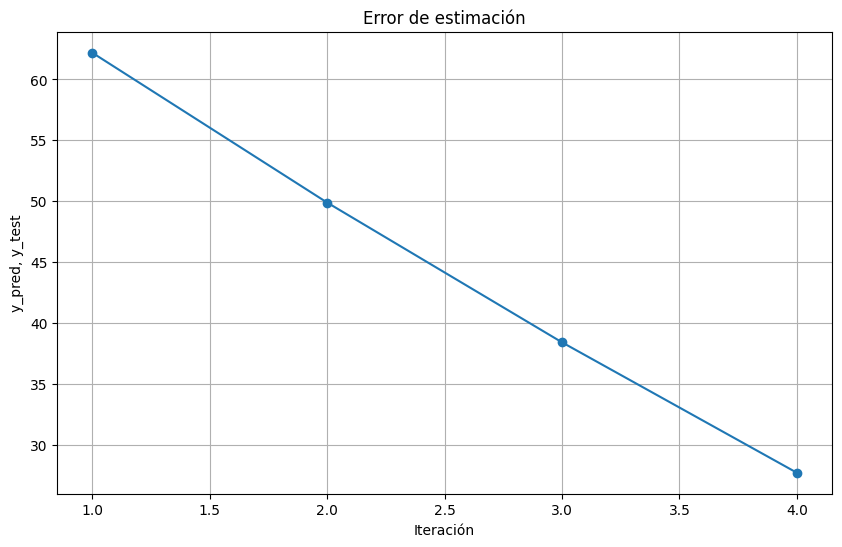

In [81]:
BGD(X_train,y_train,X_test,y_test,iteraciones,a,ws)